### Load DF

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp


# Load the dataset
df_raw = pd.read_csv('ais_disabling_events.csv')

# Display the first few rows of the dataset
df_raw.head()

,gap_id,mmsi,vessel_class,flag,vessel_length_m,vessel_tonnage_gt,gap_start_timestamp,gap_start_lat,gap_start_lon,gap_start_distance_from_shore_m,gap_end_timestamp,gap_end_lat,gap_end_lon,gap_end_distance_from_shore_m,gap_hours
0,40072d9edfca0cfd28872cbf9e382e0c,111112726,other,NaN,32.064056,139.583282,2018-03-22 08:59:22+00:00,11.847433,-21.832185,384000.0,2018-03-22 22:00:56+00:00,11.412485,-23.689107,384000.0,13.016667
1,52dcbd77bbdad9ee2642f574acf45190,150402949,other,CHN,54.994278,904.204044,2019-01-31 04:09:19+00:00,-45.895618,-60.642950,396000.0,2019-01-31 18:00:44+00:00,-45.808745,-60.654917,392000.0,13.850000
2,22b6d49ed4bb4d017884b6299ed185f4,204201370,other,PRT,15.350000,40.940000,2018-05-27 04:47:20+00:00,37.836315,-29.405573,95000.0,2018-05-28 14:32:01+00:00,37.860093,-29.286443,87000.0,33.733333
3,1abe463d7f61b110c44f1d1b4654a213,204206740,other,PRT,20.000000,77.263333,2019-06-21 12:17:01+00:00,32.190453,-18.031552,98000.0,2019-06-22 18:56:01+00:00,32.119552,-18.123323,109000.0,30.650000
4,72d047a15e33f67c3c5b91c78ff612be,204209840,other,PRT,20.000000,87.435000,2017-07-02 13:13:08+00:00,39.388467,-29.215400,93000.0,2017-07-04 15:30:29+00:00,38.909333,-28.329817,17000.0,50.283333


### EDA

##### Nationality, type, and unique vessels

In [175]:
df_main = df_raw.copy() 
# df_main = df_main.head(1000) # keep only the first 100 rows for now

print(df_main.shape)

# count how many rows are in each class in vessel_class
print('---------------------------')
print(df_main['vessel_class'].value_counts())

# count unique countries 
print('---------------------------')
print(df_main['flag'].value_counts())

# count unique values in 'mmsi' column
print('---------------------------')
print(df_main['mmsi'].nunique())

(55368, 15)
---------------------------
drifting_longlines    18641
squid_jigger          16021
tuna_purse_seines      8620
trawlers               7913
other                  4173
Name: vessel_class, dtype: int64
---------------------------
CHN    15624
TWN    12867
ESP     4100
USA     3543
KOR     2618
       ...  
MLT        1
TCA        1
AFG        1
IRQ        1
MDG        1
Name: flag, Length: 101, dtype: int64
---------------------------
5269


##### Signal gap time (hours), distribution

count    55368.000000
mean       100.392152
std        371.332756
min         12.000000
25%         15.583333
50%         23.483333
75%         67.800000
max      17215.933333
Name: gap_hours, dtype: float64


<Axes: ylabel='Frequency'>

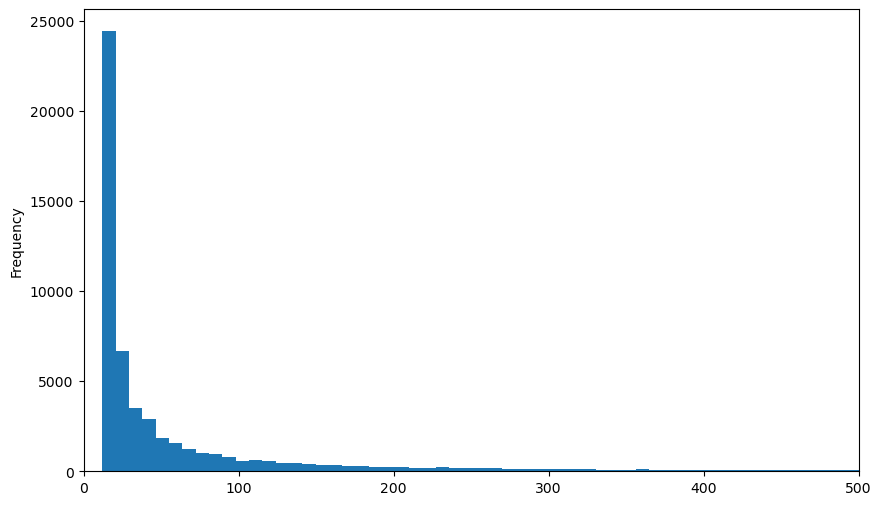

In [176]:
print(df_main['gap_hours'].describe())
# plot distribution of  of df_main['gap_hours']
df_main['gap_hours'].plot(kind='hist', bins = 2000, figsize=(10, 6), xlim=(0, 500))

In [177]:
#  calculate distance traveled between start and end of gap. 

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    
    """
    Calculate the great circle distance in meters 
    between two points on the earth (specified in decimal degrees)
    """
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 

    # Radius of earth in kilometers is 6371
    meters = 6371 * c * 1000
    return meters

df_main['gap_distance'] = df_main.apply(lambda row: haversine(row['gap_start_lon'], row['gap_start_lat'], row['gap_end_lon'], row['gap_end_lat']), axis=1)


<Axes: xlabel='gap_hours', ylabel='gap_distance'>

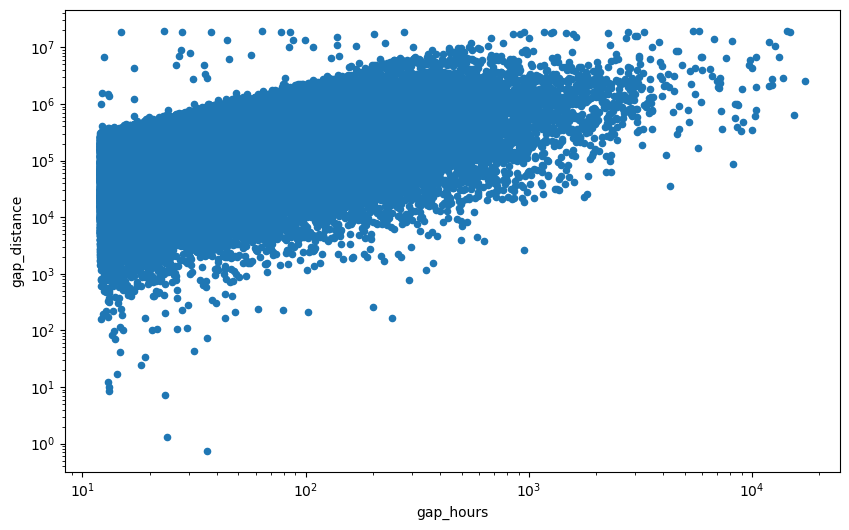

In [178]:
# scatterplot between gap_hours and gap_distance in log scale
df_main.plot(kind='scatter', x='gap_hours', y='gap_distance', loglog=True, figsize=(10, 6))#, xlim=(0, 500), ylim=(0, 1000000))

In [179]:
df_main

,gap_id,mmsi,vessel_class,flag,vessel_length_m,vessel_tonnage_gt,gap_start_timestamp,gap_start_lat,gap_start_lon,gap_start_distance_from_shore_m,gap_end_timestamp,gap_end_lat,gap_end_lon,gap_end_distance_from_shore_m,gap_hours,gap_distance
0,40072d9edfca0cfd28872cbf9e382e0c,111112726,other,NaN,32.064056,139.583282,2018-03-22 08:59:22+00:00,11.847433,-21.832185,384000.0,2018-03-22 22:00:56+00:00,11.412485,-23.689107,384000.0,13.016667,207942.844772
1,52dcbd77bbdad9ee2642f574acf45190,150402949,other,CHN,54.994278,904.204044,2019-01-31 04:09:19+00:00,-45.895618,-60.642950,396000.0,2019-01-31 18:00:44+00:00,-45.808745,-60.654917,392000.0,13.850000,9704.232296
2,22b6d49ed4bb4d017884b6299ed185f4,204201370,other,PRT,15.350000,40.940000,2018-05-27 04:47:20+00:00,37.836315,-29.405573,95000.0,2018-05-28 14:32:01+00:00,37.860093,-29.286443,87000.0,33.733333,10789.069446
3,1abe463d7f61b110c44f1d1b4654a213,204206740,other,PRT,20.000000,77.263333,2019-06-21 12:17:01+00:00,32.190453,-18.031552,98000.0,2019-06-22 18:56:01+00:00,32.119552,-18.123323,109000.0,30.650000,11695.860573
4,72d047a15e33f67c3c5b91c78ff612be,204209840,other,PRT,20.000000,87.435000,2017-07-02 13:13:08+00:00,39.388467,-29.215400,93000.0,2017-07-04 15:30:29+00:00,38.909333,-28.329817,17000.0,50.283333,93113.334361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55363,b77bb764b1f2a59bb33a5c6849d617c8,416005097,drifting_longlines,TWN,40.200000,327.000000,2018-07-11 01:09:02+00:00,-28.219092,-160.120093,729000.0,2018-07-11 16:12:19+00:00,-26.869358,-161.908588,658000.0,15.050000,231547.579925
55364,c17d1c2f4e1103aa0f9f117e0a6b1cb0,416053500,drifting_longlines,TWN,55.900000,496.000000,2018-05-17 12:21:25+00:00,-39.040710,156.953980,634000.0,2018-05-18 15:07:55+00:00,-38.680773,157.475063,671000.0,26.766667,60311.167021
55365,c84e6686f08d646090be9f445bfd1754,224900000,drifting_longlines,ESP,32.775000,411.308571,2019-11-25 12:48:03+00:00,-29.389027,-101.996370,754000.0,2019-11-27 05:24:46+00:00,-29.645573,-102.152453,750000.0,40.600000,32278.051759
55366,5123e83ada1b2c2d729a0ccd67171e41,412326895,drifting_longlines,CHN,35.500000,255.000000,2018-06-04 12:48:03+00:00,-11.700400,163.773813,170000.0,2018-06-05 07:52:55+00:00,-11.259930,164.288607,161000.0,19.066667,74469.621439


In [180]:
df_main['gap_start_timestamp'] = pd.to_datetime(df_main['gap_start_timestamp'])

In [181]:
from timezonefinder import TimezoneFinder
from datetime import datetime
import pandas as pd
import pytz

# Create an instance of TimezoneFinder
tf = TimezoneFinder()

# Define function to get timezone
def get_timezone(row):
    return tf.timezone_at(lng=row['gap_start_lon'], lat=row['gap_start_lat']) # note the lng (longitude) comes first

# Define function to get local time
def get_local_time(row):
    utc_time = row['gap_start_timestamp']
    timezone_str = row['start_timezone']
    timezone = pytz.timezone(timezone_str)

    return utc_time.replace(tzinfo=pytz.utc).astimezone(timezone)

# Apply the functions
df_main['start_timezone'] = df_main.apply(get_timezone, axis=1)
df_main['start_localtime'] = df_main.apply(get_local_time, axis=1)


In [182]:
df_main.iloc[:,5:].head(10)

,vessel_tonnage_gt,gap_start_timestamp,gap_start_lat,gap_start_lon,gap_start_distance_from_shore_m,gap_end_timestamp,gap_end_lat,gap_end_lon,gap_end_distance_from_shore_m,gap_hours,gap_distance,start_timezone,start_localtime
0,139.583282,2018-03-22 08:59:22+00:00,11.847433,-21.832185,384000.0,2018-03-22 22:00:56+00:00,11.412485,-23.689107,384000.0,13.016667,207942.844772,Etc/GMT+1,2018-03-22 07:59:22-01:00
1,904.204044,2019-01-31 04:09:19+00:00,-45.895618,-60.642950,396000.0,2019-01-31 18:00:44+00:00,-45.808745,-60.654917,392000.0,13.850000,9704.232296,Etc/GMT+4,2019-01-31 00:09:19-04:00
2,40.940000,2018-05-27 04:47:20+00:00,37.836315,-29.405573,95000.0,2018-05-28 14:32:01+00:00,37.860093,-29.286443,87000.0,33.733333,10789.069446,Etc/GMT+2,2018-05-27 02:47:20-02:00
3,77.263333,2019-06-21 12:17:01+00:00,32.190453,-18.031552,98000.0,2019-06-22 18:56:01+00:00,32.119552,-18.123323,109000.0,30.650000,11695.860573,Etc/GMT+1,2019-06-21 11:17:01-01:00
4,87.435000,2017-07-02 13:13:08+00:00,39.388467,-29.215400,93000.0,2017-07-04 15:30:29+00:00,38.909333,-28.329817,17000.0,50.283333,93113.334361,Etc/GMT+2,2017-07-02 11:13:08-02:00
5,154.000000,2017-12-10 20:05:37+00:00,38.722653,-30.001233,102000.0,2017-12-11 10:03:05+00:00,38.235638,-29.421588,65000.0,13.950000,74016.334302,Etc/GMT+2,2017-12-10 18:05:37-02:00
6,147.050000,2018-03-19 01:52:26+00:00,24.779287,-16.362843,109000.0,2018-03-20 00:01:12+00:00,25.209573,-16.202693,130000.0,22.133333,50494.678429,Etc/GMT+1,2018-03-19 00:52:26-01:00
7,215.000000,2017-08-15 22:20:47+00:00,37.736542,-29.455823,107000.0,2017-08-27 18:59:56+00:00,37.615720,-26.783042,85000.0,284.650000,235602.406125,Etc/GMT+2,2017-08-15 20:20:47-02:00
8,162.000000,2019-07-05 18:47:46+00:00,31.738387,-17.508000,111000.0,2019-07-10 22:31:30+00:00,32.506525,-18.992483,165000.0,123.716667,163822.427084,Etc/GMT+1,2019-07-05 17:47:46-01:00
9,176.000000,2018-09-21 06:37:43+00:00,52.868560,-12.355587,145000.0,2018-09-21 20:15:43+00:00,52.878315,-12.795858,171000.0,13.633333,29568.590651,Etc/GMT+1,2018-09-21 05:37:43-01:00


##### Daytime vs Nighttime

In [183]:
from astral.sun import sun
from astral import LocationInfo
import pandas as pd

# Define function to get sunrise and sunset times
def get_sun_times(row):
    loc = LocationInfo("", "", "", row['gap_start_lat'], row['gap_start_lon'])
    try:
        s = sun(loc.observer, date=row['gap_start_timestamp'].date())  # use date() to get the date part of the timestamp
        return pd.Series([s['sunrise'], s['sunset']])
    except Exception:
        return pd.Series([pd.NaT, pd.NaT])  # return NaT (not a time) for dates when sun doesn't rise or set

# Apply the function and create new columns
df_main[['start_sunrise', 'start_sunset']] = df_main.apply(get_sun_times, axis=1)

In [184]:
# df_temp = df_main[df_main['start_sunrise'].isna()]
# temp_weird_indicies = df_temp[abs(df_temp['gap_start_lat']) < 66.5].index
# df_temp[abs(df_temp['gap_start_lat']) < 66.5]

,gap_id,mmsi,vessel_class,flag,vessel_length_m,vessel_tonnage_gt,gap_start_timestamp,gap_start_lat,gap_start_lon,gap_start_distance_from_shore_m,gap_end_timestamp,gap_end_lat,gap_end_lon,gap_end_distance_from_shore_m,gap_hours,gap_distance,start_timezone,start_localtime,start_sunrise,start_sunset
38,90ebae94ae2d8aa2c87029880296f451,257548600,other,NOR,21.310000,162.000000,2018-06-09 21:23:29+00:00,66.082000,6.012960,249000.0,2018-06-10 09:31:47+00:00,66.019733,5.981813,248000.0,12.133333,7.065026e+03,Etc/GMT,2018-06-09 21:23:29+00:00,NaT,NaT
43,03958b6370af5fb192ab18b4f4963d7e,272770000,other,UKR,56.700000,943.000000,2017-12-09 08:11:07+00:00,-66.179333,-177.972880,739000.0,2017-12-22 12:54:19+00:00,-73.084160,-177.684507,390000.0,316.716667,7.678606e+05,Etc/GMT+12,2017-12-08 20:11:07-12:00,NaT,NaT
179,f848ada8b41ceddf787662a015cea8d3,665111119,other,SHN,50.685000,1352.000000,2018-12-03 20:00:34+00:00,-65.304850,-179.184317,747000.0,2018-12-11 15:51:08+00:00,-71.911850,176.984267,198000.0,187.833333,7.505472e+05,Etc/GMT+12,2018-12-03 08:00:34-12:00,NaT,NaT
426,39f9fc47055f77215bf338882760c3b6,273354130,other,RUS,34.333333,1158.280809,2017-12-02 12:44:59+00:00,-64.509555,176.413877,614000.0,2017-12-06 09:57:07+00:00,-64.867093,178.273173,665000.0,93.200000,9.691636e+04,Etc/GMT-12,2017-12-03 00:44:59+12:00,NaT,NaT
571,ff06c126683188559c9c0646ff0ab07e,231089000,other,FRO,43.249084,726.000000,2018-07-12 14:11:41+00:00,63.979200,-36.402907,175000.0,2018-07-22 03:56:59+00:00,64.081200,-23.903067,57000.0,229.750000,6.077705e+05,Etc/GMT+2,2018-07-12 12:11:41-02:00,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27587,63e6a193f4d02f204aeee6e26ee9ab04,412421059,squid_jigger,CHN,67.070000,1347.000000,2017-12-11 11:36:35+00:00,-42.583465,-58.438495,374000.0,2017-12-12 01:08:53+00:00,-42.583680,-58.458507,373000.0,13.533333,1.638566e+03,Etc/GMT+4,2017-12-11 07:36:35-04:00,NaT,NaT
27660,24978a685279f67051ad2e82995e55f1,412555279,squid_jigger,CHN,55.436174,857.211569,2018-11-24 18:29:03+00:00,-45.722675,-60.131920,427000.0,2018-11-28 23:06:34+00:00,-45.708360,-60.480510,401000.0,100.616667,2.711081e+04,Etc/GMT+4,2018-11-24 14:29:03-04:00,NaT,NaT
27844,17e719f8af6a885328c4dd01c36d2ed6,412420462,squid_jigger,CHN,44.980000,498.000000,2018-11-30 04:40:46+00:00,-19.765148,-77.495450,543000.0,2018-11-30 20:13:24+00:00,-19.719923,-77.552687,541000.0,15.533333,7.821300e+03,Etc/GMT+5,2018-11-29 23:40:46-05:00,NaT,NaT
30785,927c77905f004f1bc7a444c5e3a5058d,775630000,tuna_purse_seines,VEN,65.300000,1055.000000,2017-06-05 11:20:48+00:00,1.086043,-83.371807,359000.0,2017-07-18 11:53:49+00:00,7.678907,-83.588293,84000.0,1032.550000,7.334853e+05,Etc/GMT+6,2017-06-05 05:20:48-06:00,NaT,NaT


In [188]:
### define function to determine if it's daytime at the start of the gap

def is_polar_daytime(row):
    # If sunrise and sunset are not NaT, use them to determine if it's daytime
    if pd.notnull(row['start_sunrise']) and pd.notnull(row['start_sunset']):
        return row['start_sunrise'] <= row['gap_start_timestamp'] <= row['start_sunset']
    else:
        # If sunrise or sunset are NaT, estimate based on the month and latitude
        month = row['start_localtime'].month
        lat = row['gap_start_lat']
        day = row['start_localtime'].day
        
        # Determine if the date is in between equinoxes
        is_between_equinoxes = ((month > 3 or (month == 3 and day >= 20)) and (month < 9 or (month == 9 and day < 22)))
        
        # If within the Arctic Circle (approximately)
        if lat > 60:
            if is_between_equinoxes:
                return True  # Arctic summer
            else:
                return False  # Arctic winter

        # If within the Antarctic Circle (approximately)
        elif lat < -60:
            if is_between_equinoxes:
                return False  # Antarctic winter
            else:
                return True  # Antarctic summer
            
        ### The approximation of polar circles checked out, and no outlier issues remain. 


# Apply the function to create the 'daytime' column
df_main['daytime'] = df_main.apply(is_polar_daytime, axis=1)

In [190]:
# print percentage of 'True' values in 'daytime' column
print('Nighttime % (false) VS Daytime % (true):')
print('---------------------------')
print(df_main['daytime'].value_counts(normalize=True))


Nighttime % (false) VS Daytime % (true):
---------------------------
False    0.740219
True     0.259781
Name: daytime, dtype: float64


### Visualization

In [4]:
import folium

# Create a map centered around the middle of the dataset's latitudes and longitudes
m = folium.Map(location=[df_main['gap_start_lat'].mean(), df_main['gap_start_lon'].mean()], zoom_start=2)

# Add a marker for each AIS disabling event
for idx, row in df_main.iterrows():
    folium.Marker(location=[row['gap_start_lat'], row['gap_start_lon']]).add_to(m)

# Display the map
m